## IML Project
### 99106255 - 99105901


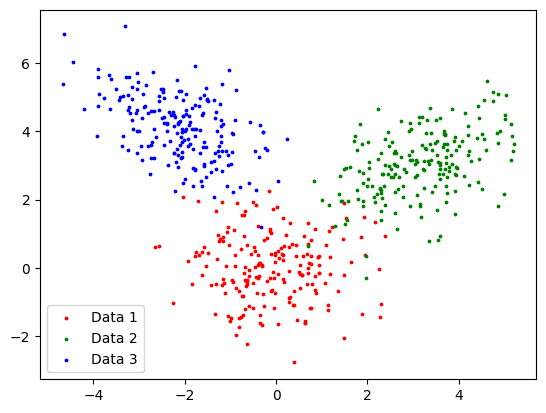

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('image1.csv', skiprows=1, delimiter=',')
data = data[:, 1:]
plt.scatter(data[:200,0],data[:200, 1], color='r', label='Data 1', s = 3)
plt.scatter(data[200:400, 0],data[200:400, 1], color='g', label='Data 2', s = 3)
plt.scatter(data[400:, 0], data[400:, 1], color='b', label='Data 3', s = 3)
plt.legend()
plt.show()

## Initialization ##

In [2]:
from scipy.stats import multivariate_normal             #requirements


n = 3                                                   #number of categories

#Initialize model values

mu = data[np.random.randint(0, data.shape[0], n), :]    #Matrix of means
sigma = np.tile(np.cov(data.T), (n,1,1))                #Matrix of covariances
pi = np.repeat(1/n, n, axis = 0)                        #Probability matrix of categories


## E-step Function ##

$$\hat{q_{n}}^{(i)} =  \frac{\pi_{i}\mathcal{N}(y_i; \mu_k,\,\Sigma_k)}{\sum_{k}^{} \pi_{k}\mathcal{N}(y_i; \mu_k,\,\Sigma_k)}$$


In [3]:
def E_step(data, mu, sigma, pi):
    Q = np.asarray([pi[i] * multivariate_normal.pdf(data, mu[i,:], sigma[i,:,:]) for i in range(n)]).T
    Q = Q / np.reshape(np.sum(Q, axis=1),(len(data), 1))
    return Q


## M-step Function

In [86]:
def M_step(data, sigma, Q):
    mu =  np.matrix([np.average(data, weights=Q[:,i], axis=0) for i in range(n)])
    for i in range(n):
        sigma[i, :, :] = (data - mu[i,:]).T @ np.multiply((data - mu[i,:]), np.tile(Q[:,i], (2,1)).T)
        sigma[i, :, :] = sigma[i, :, :] / np.sum(Q[:,i])
    pi = np.mean(Q, axis=0)
    return mu, sigma, pi